In [33]:
import sys
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import skimage as ski
import PIL as PIL
import time

from scipy.signal import convolve2d
from scipy.ndimage import gaussian_filter
from scipy.ndimage import sobel
from PIL import Image


np.set_printoptions(threshold = 10000)

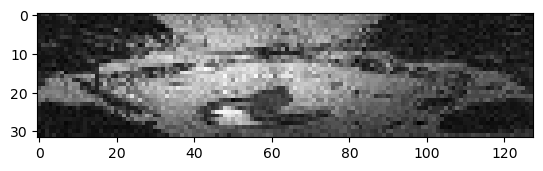

In [34]:
# Load the segmentation file “label_train00.npy” file. 

image = np.load(r"image_train00.npy")

plt.imshow(image[:, 127, :], cmap="gray")
plt.show()

In [35]:
# I have decided to use a Cartesian coordinate system, 
# Dimensions are measured in mm, with the intensity value for the voxel located at the centre of each voxel along
# each voxel.
# Numpy image data is provided in the form plane, row, column therefore I have decided to use the Cartesian 
# convention z,y,x throughout my code, with z being depth from superior to inferior, y being "column" values from
# anterior to posterior and x being "row" values from left to right

# Current voxel dimensions in mm
voxel_size_zyx = np.array([2.0, 0.5, 0.5])

# Physical size of image in each dimension (mm)
length_z = (image.shape[0])*(voxel_size_zyx[0])
length_y = (image.shape[1])*(voxel_size_zyx[1])
length_x = (image.shape[2])*(voxel_size_zyx[2])

# Create grid for original data
z_grid = np.arange(0, length_z, voxel_size_zyx[0])
y_grid = np.arange(0, length_y, voxel_size_zyx[1])
x_grid = np.arange(0, length_x, voxel_size_zyx[2])

# Coordinates for the support points to which the known voxel intensity values are assigned:
support_points = ([z_grid, y_grid, x_grid])

In [36]:
# New voxel dimensions in 1.0 x 1.0 x 1.0 mm
new_voxel_size_zyx = np.array([1.0, 1.0, 1.0])

# Create grid for re-samling data
z_grid_new = np.arange(0, length_z, new_voxel_size_zyx[0])
y_grid_new =  np.arange(0, length_y, new_voxel_size_zyx[1])
x_grid_new =  np.arange(0, length_x, new_voxel_size_zyx[2])

# Create a regular meshgrid with coordinates at which the intensity values will be interpolated 
Z_new, Y_new, X_new = np.meshgrid([z_grid_new], [y_grid_new], [x_grid_new], indexing = "ij")
coordinate_grid = np.transpose(np.array([Z_new, Y_new, X_new]))

In [37]:
def volume_resize(support_points, image, coordinate_grid):
    interpolated_image = []
    for point in coordinate_grid:
        int = sp.interpolate.interpn(support_points, image, point , method = "linear", bounds_error = False, fill_value = None)
        interpolated_image.append(int)
    return interpolated_image

interpolation = volume_resize(support_points, image, coordinate_grid)
new_image = np.transpose(np.array(interpolation))
print(new_image.shape)

(64, 64, 64)


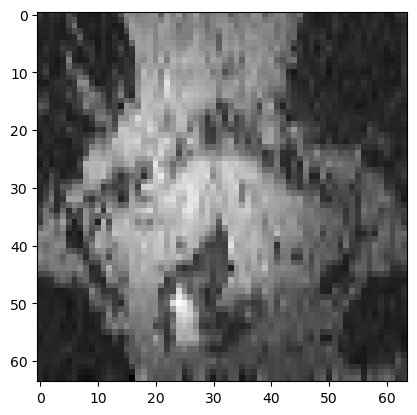

In [38]:
plt.imshow(new_image[:, 63, :], cmap="gray")
plt.show()

In [39]:
# New voxel dimensions 1.5 x 1.5 x 1.5 mm
new_voxel_size_zyx2 = np.array([1.5, 1.5, 1.5])

# Create grid for re-samling data
z_grid_new2 = np.arange(0, length_z, new_voxel_size_zyx2[0])
y_grid_new2 =  np.arange(0, length_y, new_voxel_size_zyx2[1])
x_grid_new2 =  np.arange(0, length_x, new_voxel_size_zyx2[2])

# Create a regular meshgrid with coordinates at which the intensity values will be interpolated 
Z_new2, Y_new2, X_new2 = np.meshgrid([z_grid_new2], [y_grid_new2], [x_grid_new2], indexing = "ij")
coordinate_grid2 = np.transpose(np.array([Z_new2, Y_new2, X_new2]))

In [40]:
interpolation2 = volume_resize(support_points, image, coordinate_grid2)
new_image2 = np.transpose(np.array(interpolation2))

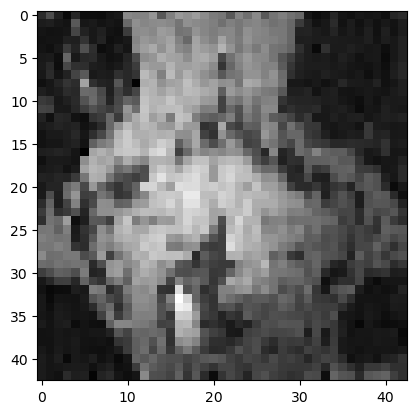

In [41]:
plt.imshow(new_image2[:, 42, :], cmap="gray")
plt.show()

In [42]:
def image_derivatives_gauss(image, sigma):
    filtered_image = sp.ndimage.gaussian_filter(image, sigma = sigma, order = 1)
    return filtered_image

filter_1 = image_derivatives_gauss(new_image, new_voxel_size_zyx)

filter_2 = image_derivatives_gauss(new_image, new_voxel_size_zyx2)

print(filter_1.shape)
    

(64, 64, 64)


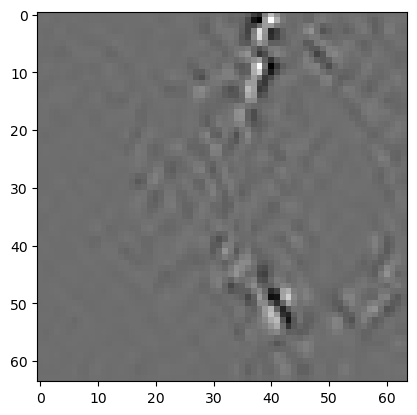

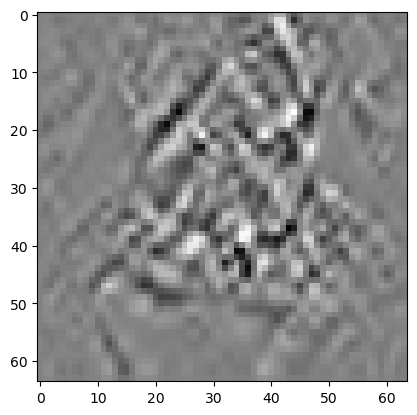

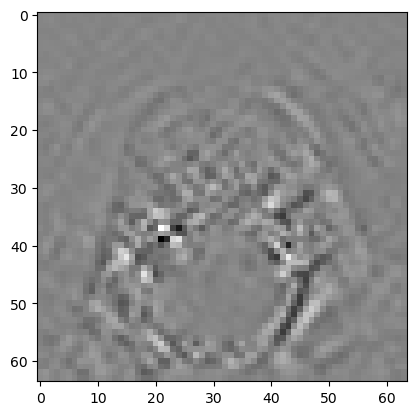

In [46]:
plt.imshow(filter_1[:, :, 31], cmap="gray")
plt.savefig("exp1_size1_gauss_dx_slice31.png", format = "png")
plt.show()

plt.imshow(filter_1[:, 31, :], cmap="gray")
plt.savefig("exp1_size1_gauss_dy_slice31.png", format = "png")
plt.show()

plt.imshow(filter_1[31, :, :], cmap="gray")
plt.savefig("exp1_size1_gauss_dz_slice31.png", format = "png")
plt.show()

In [44]:
filter_2 = image_derivatives_gauss(new_image2, new_voxel_size_zyx2)
print(filter_2.shape)

(43, 43, 43)


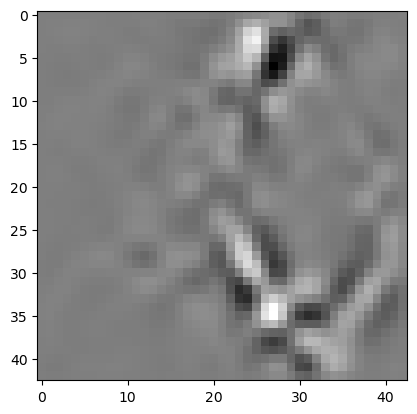

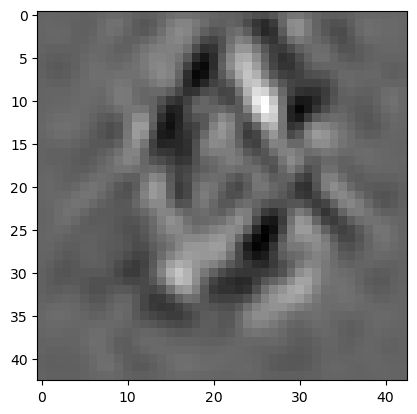

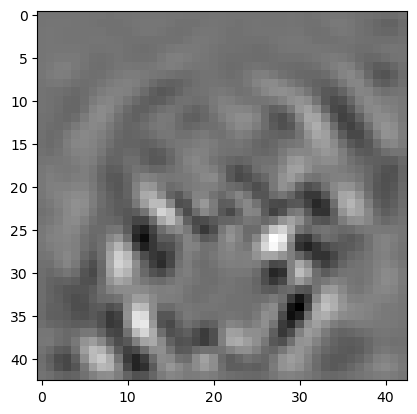

In [47]:
plt.imshow(filter_2[:, :, 22], cmap="gray")
plt.savefig("exp1_size1.5_gauss_dx_slice22.png", format = "png")
plt.show()

plt.imshow(filter_2[:, 22, :], cmap="gray")
plt.savefig("exp1_size1.5_gauss_dy_slice22.png", format = "png")
plt.show()

plt.imshow(filter_2[22, :, :], cmap="gray")
plt.savefig("exp1_size1.5_gauss_dz_slice22.png", format = "png")
plt.show()